# Import Libraries


In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [239]:
data=pd.read_csv('Ecommerce.csv',encoding = 'unicode_escape')

In [240]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [241]:
# shape of df

data.shape

(541909, 9)

In [242]:
# df info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
Unnamed: 8     0 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [243]:
# df description

data.describe()

,Quantity,UnitPrice,CustomerID,Unnamed: 8
count,541909.000000,541909.000000,406829.000000,0.0
mean,9.552250,4.611114,15287.690570,NaN
std,218.081158,96.759853,1713.600303,NaN
min,-80995.000000,-11062.060000,12346.000000,NaN
25%,1.000000,1.250000,13953.000000,NaN
50%,3.000000,2.080000,15152.000000,NaN
75%,10.000000,4.130000,16791.000000,NaN
max,80995.000000,38970.000000,18287.000000,NaN


### Amount spent on week days?


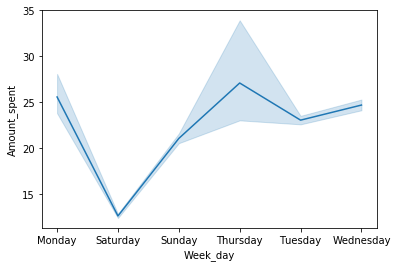

In [310]:
sns.lineplot(data_n1['Week_day'],data_n1['Amount_spent'])

### Amount spent on months:

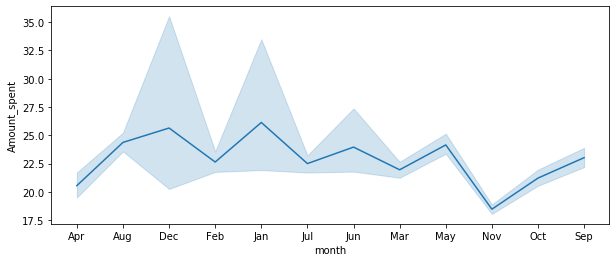

In [311]:
plt.figure(figsize=(10,4))
sns.lineplot(data_n1['month'],data_n1['Amount_spent'])

### Amount spent in years

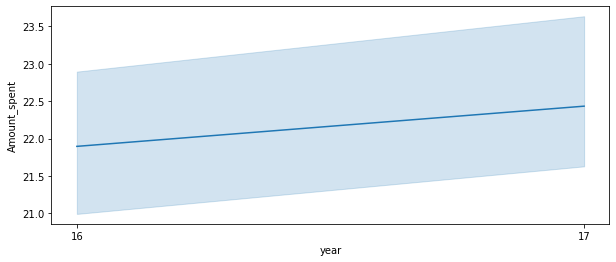

In [312]:
plt.figure(figsize=(10,4))
sns.lineplot(data_n1['year'],data_n1['Amount_spent'])

### Amount spent on months

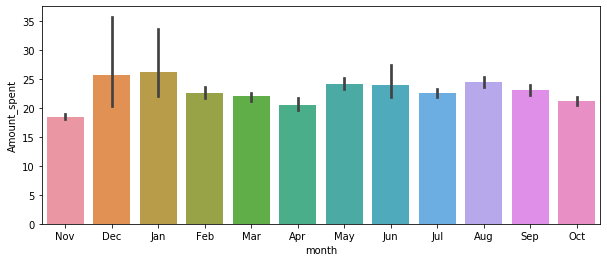

In [313]:
plt.figure(figsize=(10,4))
sns.barplot(data_n1['month'],data_n1['Amount_spent'])

### Amount spent in year 

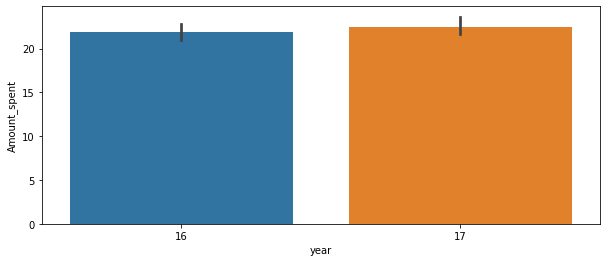

In [314]:
plt.figure(figsize=(10,4))
sns.barplot(data_n1['year'],data_n1['Amount_spent'])

### Observations:
- there is slight increase in amount spent in 2016 to 2017

<a id="2"></a> <br>
## Step 2 : Data Cleansing

In [245]:
data = data.drop(columns="Unnamed: 8")

In [246]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(data.isnull().sum())/len(data), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [247]:
# Droping rows having missing values

data_new = data.dropna()
data_new.shape

(406829, 8)

In [248]:
# Changing the datatype of Customer Id as per Business understanding

data_new['CustomerID'] = data_new['CustomerID'].astype(str)

<a id="3"></a> <br>
## Step 3 : Data Preparation

#### We are going to analysis the Customers based on below 3 factors:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

# Date

In [250]:
data_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [251]:
data_new[['day','month','year']] = data_new['InvoiceDate'].str.split('-',expand=True)

In [252]:
data_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,29,Nov,16
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,29,Nov,16
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,29,Nov,16
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,29,Nov,16
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,29,Nov,16


<a id="3"></a> <br>
## Step 3 : Data Preparation

#### We are going to analysis the Customers based on below 3 factors:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [253]:
data_new['Amount']=data_new['UnitPrice']*data_new['Quantity']

# New Attribute : Frequency

In [254]:
frequency = data_new.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


# New Attribute : Monetary

In [255]:
# Monetary Function

# Finding total amount spent per customer
monetary = data_new.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# Merging Frequency and Monetory Columns:

In [256]:
#creating master dataset
master = monetary.merge(frequency, on = "CustomerID", how = "inner")
master.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


# Recency Value

In [257]:
data_new['InvoiceDate']=pd.to_datetime(data_new['InvoiceDate'])

In [258]:
# Finding max data
maximum = max(data_new.InvoiceDate)

In [259]:
# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.
maximum = maximum + pd.DateOffset(days = 1)

In [260]:
data_new['diff'] = maximum - data_new.InvoiceDate
data_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,29,Nov,16,15.30,374 days
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,29,Nov,16,20.34,374 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,29,Nov,16,22.00,374 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,29,Nov,16,20.34,374 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,29,Nov,16,20.34,374 days


In [261]:
#Dataframe merging by recency
recency = data_new.groupby('CustomerID').diff.min()
recency = recency.reset_index()
recency.head()

,CustomerID,diff
0,12346.0,326 days
1,12347.0,3 days
2,12348.0,76 days
3,12349.0,19 days
4,12350.0,311 days


### RFM combined DataFrame

In [262]:
#Combining all recency, frequency and monetary parameters
RFM = master.merge(recency, on = "CustomerID")
RFM.columns = ['CustomerID','Amount','Frequency','Recency']
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326 days
1,12347.0,4310.00,182,3 days
2,12348.0,1797.24,31,76 days
3,12349.0,1757.55,73,19 days
4,12350.0,334.40,17,311 days


In [263]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
CustomerID    4372 non-null object
Amount        4372 non-null float64
Frequency     4372 non-null int64
Recency       4372 non-null timedelta64[ns]
dtypes: float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 170.8+ KB


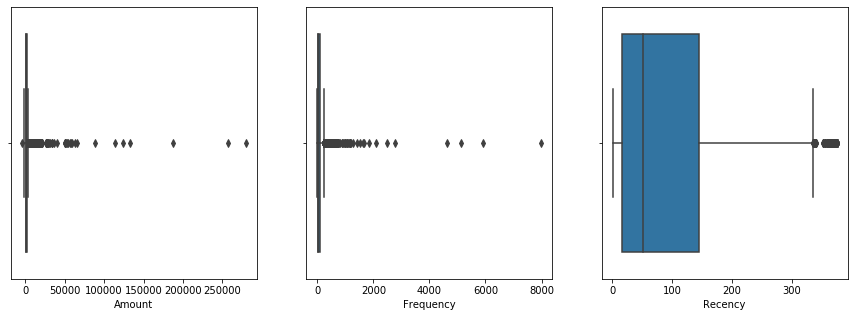

In [264]:
# outlier treatment for Amount
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM.Amount, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()

In [265]:
# outlier treatment for Amount
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

In [266]:
# outlier treatment for Frequency
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

In [267]:
# outlier treatment for Recency
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

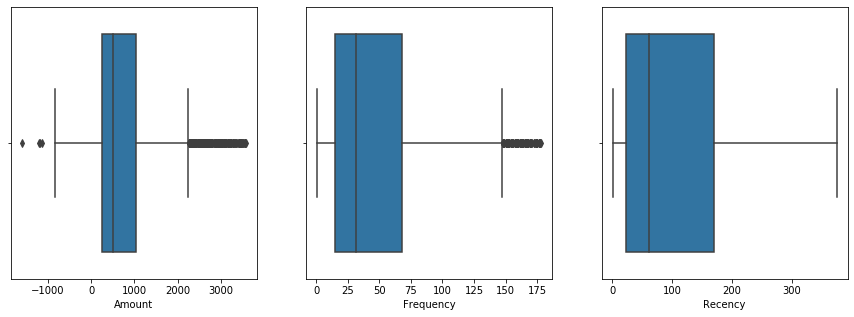

In [268]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM.Amount, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()

In [269]:
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326 days
2,12348.0,1797.24,31,76 days
3,12349.0,1757.55,73,19 days
4,12350.0,334.40,17,311 days
5,12352.0,1545.41,95,37 days


### Scaling the RFM data

In [270]:
# standardise all parameters
RFM_norm1 = RFM.drop("CustomerID", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [271]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-1.041614,-1.070949,2.131196
1,1.385298,-0.375498,-0.277581
2,1.331702,0.631707,-0.826782
3,-0.590055,-0.711233,1.986670
4,1.045238,1.159290,-0.653350


In [272]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(RFM_norm1)

KMeans(max_iter=50, n_clusters=4)

In [273]:
kmeans.labels_

array([0, 2, 2, ..., 0, 1, 2])

In [274]:
kmeans.inertia_

2953.2025853485193

In [275]:
kmeans.cluster_centers_

array([[-0.59908717, -0.62822537,  1.49962127],
       [-0.43493057, -0.51270756, -0.47010455],
       [ 0.45542905,  0.90944837, -0.51322971],
       [ 2.284957  ,  1.69566864, -0.63486792]])

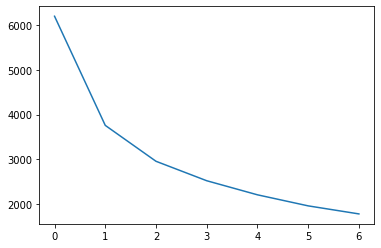

In [276]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RFM_norm1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [277]:
# Silhouette analysis
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RFM_norm1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(RFM_norm1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.42931697820201253
For n_clusters=3, the silhouette score is 0.4397575154314164
For n_clusters=4, the silhouette score is 0.40872284567185085
For n_clusters=5, the silhouette score is 0.38796803855365686
For n_clusters=6, the silhouette score is 0.3566083177835665
For n_clusters=7, the silhouette score is 0.33147984426592914
For n_clusters=8, the silhouette score is 0.34055985487827495


In [278]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(RFM_norm1)

KMeans(max_iter=50, n_clusters=3)

In [279]:
kmeans.labels_

array([1, 2, 0, ..., 1, 2, 0])

In [280]:
# assign the label
RFM['Cluster_Id'] = kmeans.labels_
RFM.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,326 days,1
2,12348.0,1797.24,31,76 days,2
3,12349.0,1757.55,73,19 days,0
4,12350.0,334.40,17,311 days,1
5,12352.0,1545.41,95,37 days,0


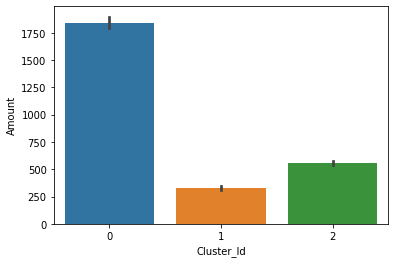

In [309]:
# Box plot to visualize Cluster Id vs Frequency

sns.barplot(x='Cluster_Id', y='Amount', data=RFM)

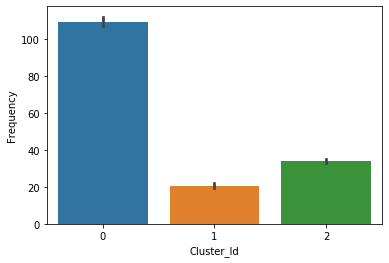

In [308]:
# Box plot to visualize Cluster Id vs Frequency

sns.barplot(x='Cluster_Id', y='Frequency', data=RFM)

In [283]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697 entries, 0 to 4371
Data columns (total 5 columns):
CustomerID    3697 non-null object
Amount        3697 non-null float64
Frequency     3697 non-null int64
Recency       3697 non-null timedelta64[ns]
Cluster_Id    3697 non-null int32
dtypes: float64(1), int32(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 318.9+ KB


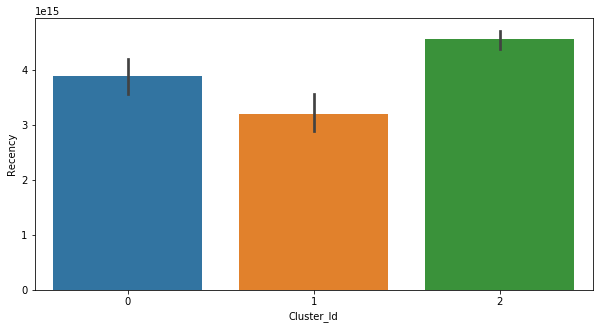

In [297]:
# Box plot to visualize Cluster Id vs Recency
plt.figure(figsize=(10,5))
sns.barplot(y='Recency', x='Cluster_Id', data=RFM)

### Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering, 
- Divisive 
- Agglomerative.

**Single Linkage:<br>**

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.
![](https://www.saedsayad.com/images/Clustering_single.png)

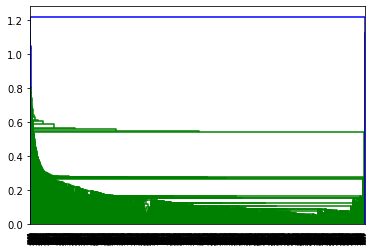

In [289]:
# Single linkage: 
from scipy.cluster.hierarchy import dendrogram, linkage,cut_tree

mergings = linkage(RFM_norm1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

**Average Linkage:<br>**

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.
![](https://www.saedsayad.com/images/Clustering_average.png)

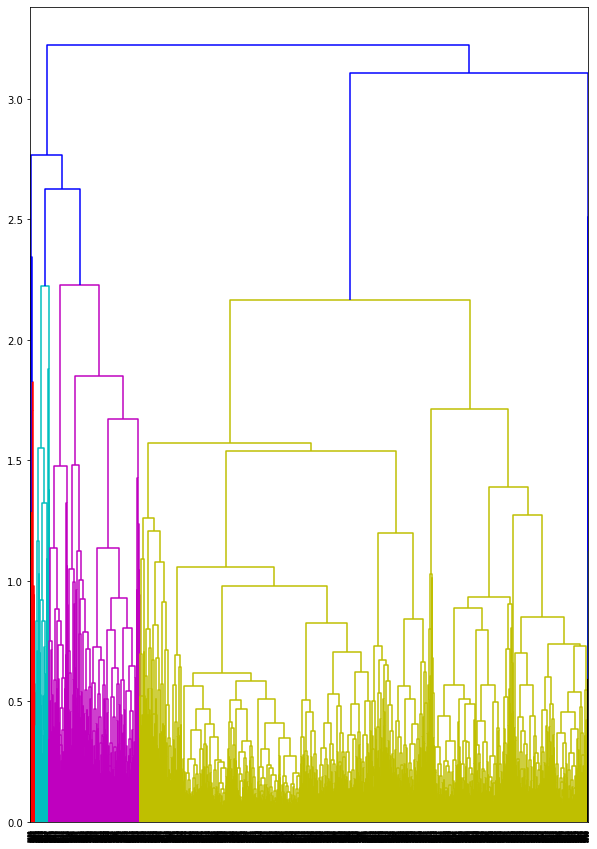

In [298]:
# Average linkage
plt.figure(figsize=(10,15))

mergings = linkage(RFM_norm1, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Cutting the Dendrogram based on K

In [299]:
# 3 clusters
from scipy.cluster.hierarchy import dendrogram, linkage,cut_tree
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, ..., 0, 0, 1])

In [300]:
# Assign cluster labels

RFM['Cluster_Labels'] = cluster_labels
RFM.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,326 days,1,0
2,12348.0,1797.24,31,76 days,2,1
3,12349.0,1757.55,73,19 days,0,1
4,12350.0,334.40,17,311 days,1,0
5,12352.0,1545.41,95,37 days,0,1


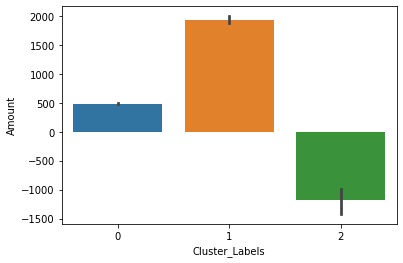

In [305]:
# Plot Cluster Id vs Amount

sns.barplot(x='Cluster_Labels', y='Amount', data=RFM)

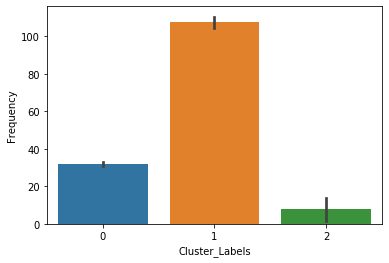

In [306]:
# Plot Cluster Id vs Frequency

sns.barplot(x='Cluster_Labels', y='Frequency', data=RFM)

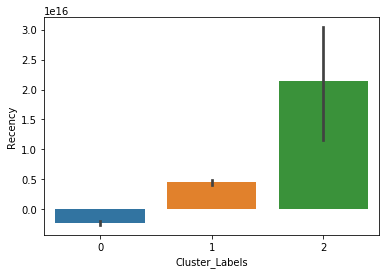

In [304]:
# Plot Cluster Id vs Recency

sns.barplot(x='Cluster_Labels', y='Recency', data=RFM)

### Observations :
K-Means Clustering with 3 Cluster Ids
- Customers with Cluster Id 0 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster Id 0 are frequent buyers.
- Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

# Hierarchical Clustering with 3 Cluster Labels
- Customers with Cluster_Labels 1 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster_Labels 1 are frequent buyers.
- Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.